# Sentiment analysis

## Levels of granuality
1. Document level
2. Sentence level
3. Aspect level, fro example:the camera in this phone is pretty good but the battery is dissapointing

## Type of sentiment analysis algorithms
- Rule/lexicon-based
    - For example, nice:2, good:1, terrible:-3
    - Today was a `good` day. Total valence: +1
    - Rely on manually crafted valence score
    - So it has predefined words that have some valence score
- Automatic/Machine Learning
    - The task is usually modeled as a classification problem, when we have some historic sentements of sentences and we need to predict a new piece of text.
    - Rely on having labelled historical data
    - Latest machine learning models can be powerful, apart from lexicon-based approach

In [2]:
import sys
!{sys.executable} -m pip install textblob 

     |████████████████████████████████| 636 kB 2.3 MB/s eta 0:00:01


1. Polarity ranges between -1(very negative) and 1(very positive)
2. Subjectivity ranges between 0(very objective) and 1(very subjective)

In [3]:
from textblob import TextBlob
my_sent = 'Today was a good day'
res = TextBlob(my_sent)
res.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

### Now let's play with out movie_reviews dataset

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'CSV/IMDB_sample.xls',index_col=0)
df.head()

,review,label
18245,This short spoof can be found on Elite's Mille...,0
19801,A singularly unfunny musical comedy that artif...,0
3222,"An excellent series, masterfully acted and dir...",1
6010,The master of movie spectacle Cecil B. De Mill...,1
16355,I was gifted with this movie as it had such a ...,0


In [74]:
titanic = str(df[df.review.str.len() == df.review.str.len().max()]['review'].values)
titanic[:40]

'["Titanic directed by James Cameron pres'

In [75]:
sent = TextBlob(titanic)
sent.sentiment

Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)

In [76]:
import sys
!{sys.executable} -m pip install wordcloud

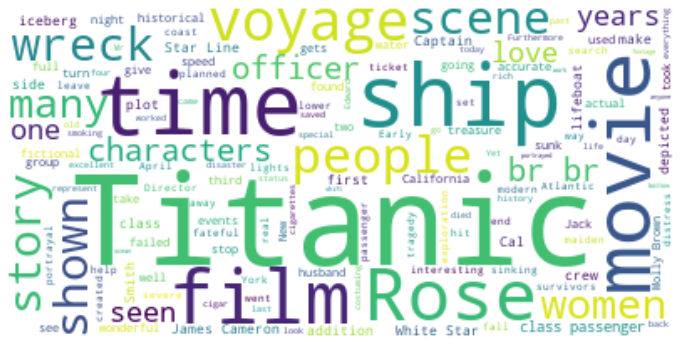

In [77]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(titanic)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

- Let's make a wordcloud of top 100 negative reviews

In [78]:
my_stopwords = {'a','s',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'br',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'film',
 'films',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 'movie',
 'movies',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r',
 'same',
 'shall',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "shouldn't",
 'since',
 'so',
 'some',
 'such',
 'than',
 'that',
 "that's",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 "there's",
 'these',
 'they',
 "they'd",
 "they'll",
 "they're",
 "they've",
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 'very',
 'was',
 "wasn't",
 'watch',
 'we',
 "we'd",
 "we'll",
 "we're",
 "we've",
 'were',
 "weren't",
 'what',
 "what's",
 'when',
 "when's",
 'where',
 "where's",
 'which',
 'while',
 'who',
 "who's",
 'whom',
 'why',
 "why's",
 'with',
 "won't",
 'would',
 "wouldn't",
 'www',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves'}

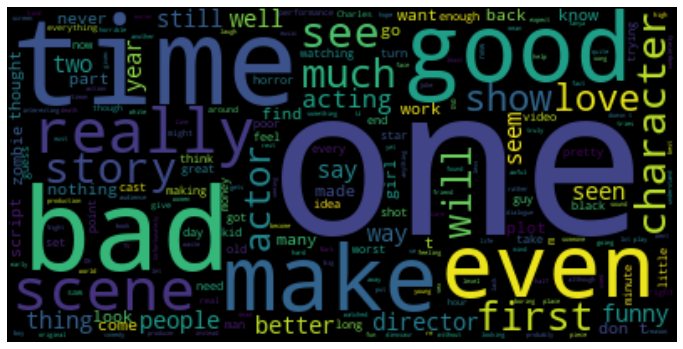

In [79]:
negative = []
for val in df[df.label == 0].review.values:
    negative.append(val)
    if len(negative) == 100:
        break

negative_cloud = WordCloud(stopwords=my_stopwords).generate(str(negative))
plt.figure(figsize=(12,12))
plt.imshow(negative_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Now let's work with amazon product reviews

In [72]:
amazon = pd.read_csv('CSV/amazon_reviews_sample.xls',index_col=0)
amazon.head()

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [87]:
from sklearn.feature_extraction.text import CountVectorizer

text = amazon.review.values
#print(text)
# Build the vectorizer and fit it
vect = CountVectorizer(max_features=500)
vect.fit(text)

# Create the bow representation
vect_bow = vect.transform(text)

# Print the bag-of-words result 
print(vect_bow.toarray())

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [90]:
vect = CountVectorizer(max_features=100)

vect.fit(text)

X_review = vect.transform(text)

X_df=pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
X_df.head()

,about,after,all,also,am,an,and,any,are,as,...,what,when,which,who,will,with,work,would,you,your
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,2,0,1,0,2,0,1
1,0,0,0,0,0,0,3,1,1,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,3,0,0,1,4,0,1,1,...,0,0,1,1,0,0,1,1,2,0
3,0,0,0,0,0,0,9,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,3,0,1,0,...,0,0,0,0,0,0,0,0,3,1


## Getting granular with n-grams
- Unigrams: single tokens
- Bigrams: pairs of tokens
- Trigrams: triples of tokens
- n-grams: sequence of tokens

In [94]:
vect = CountVectorizer(max_features=500,ngram_range=(2,2),max_df=250)

vect.fit(text)

X_review = vect.transform(text)

X_df=pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
X_df.head()

,about it,about this,after reading,after the,album is,all in,along with,am not,an excellent,and all,...,you know,you like,you ll,you need,you re,you should,you think,you to,your money,your time
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [95]:
from nltk import word_tokenize

word_tokens = [word_tokenize(review) for review in amazon.review]

len_tokens = []

for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

amazon['n_words'] = len_tokens 
amazon.head()

,score,review,n_words
0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,The best soundtrack ever to anything.: I'm re...,109
2,1,Amazing!: This soundtrack is my favorite musi...,165
3,1,Excellent Soundtrack: I truly like this sound...,145
4,1,"Remember, Pull Your Jaw Off The Floor After H...",109


In [96]:
import sys
!{sys.executable} -m pip install langdetect

     |████████████████████████████████| 981 kB 2.0 MB/s eta 0:00:01
  Created wheel for langdetect: filename=langdetect-1.0.8-py3-none-any.whl size=993191 sha256=876ac26fe4c5e104f8998267efbf1066067718be08ac30bf58c828eb7067f074
  Stored in directory: /Users/Andrew/Library/Caches/pip/wheels/1e/80/23/0a24928ec3a3906ff5027f38d2fea824e7e97f2ba7c83d91e3
Successfully built langdetect


In [99]:
from langdetect import detect_langs
languages = [] 

# Loop over the rows of the dataset and append  
for row in range(len(amazon)):
    languages.append(detect_langs(amazon.iloc[row, 1]))

# Clean the list by splitting     
languages = [str(lang).split(':')[0][1:] for lang in languages]

# Assign the list to a new feature 
amazon['language'] = languages

amazon.head()

,score,review,n_words,language
0,1,Stuning even for the non-gamer: This sound tr...,87,en
1,1,The best soundtrack ever to anything.: I'm re...,109,en
2,1,Amazing!: This soundtrack is my favorite musi...,165,en
3,1,Excellent Soundtrack: I truly like this sound...,145,en
4,1,"Remember, Pull Your Jaw Off The Floor After H...",109,en


## Now let's play with tweets dataset

In [105]:
tweets = pd.read_csv('CSV/Tweets.xls')
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [110]:
tweets.dropna(subset=['negativereason'], how='any', inplace=True)
tweets.negativereason

3                    Bad Flight
4                    Can't Tell
5                    Can't Tell
15                  Late Flight
17                   Bad Flight
                  ...          
14631                Bad Flight
14633          Cancelled Flight
14634               Late Flight
14636    Customer Service Issue
14638    Customer Service Issue
Name: negativereason, Length: 9178, dtype: object

In [111]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm'])
 
# Build and fit the vectorizers
vect1 = CountVectorizer(stop_words=my_stop_words)
vect2 = CountVectorizer(stop_words=ENGLISH_STOP_WORDS) 
vect1.fit(tweets.text)
vect2.fit(tweets.negativereason)

# Print the last 15 features from the first, and all from second vectorizer
print(vect1.get_feature_names()[-15:])
print(vect2.get_feature_names())

['zira2z3udc', 'zkatcher', 'zkoe6clgiu', 'zl4bvexmcj', 'zombie', 'zone', 'zones', 'zoom', 'zouowgv3q6', 'zrh', 'zukes', 'zurich', 'zv6cfpohl5', 'zvfmxnuelj', 'zzps5ywve2']
['attendant', 'bad', 'booking', 'cancelled', 'complaints', 'customer', 'damaged', 'flight', 'issue', 'late', 'longlines', 'lost', 'luggage', 'problems', 'service', 'tell']


In [113]:
vect1 = CountVectorizer().fit(tweets.text)
vect1.transform(tweets.text)

vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweets.text)
vect2.transform(tweets.text)

print('Length of vectorizer 1: ', len(vect1.get_feature_names()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names()))

Length of vectorizer 1:  10836
Length of vectorizer 2:  529


In [114]:
from nltk import word_tokenize

word_tokens = [word_tokenize(review) for review in tweets.text]
print('Original tokens: ', word_tokens[0])

cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print('Cleaned tokens: ', cleaned_tokens[0])

Original tokens:  ['@', 'VirginAmerica', 'it', "'s", 'really', 'aggressive', 'to', 'blast', 'obnoxious', '``', 'entertainment', "''", 'in', 'your', 'guests', "'", 'faces', '&', 'amp', ';', 'they', 'have', 'little', 'recourse']
Cleaned tokens:  ['VirginAmerica', 'it', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'amp', 'they', 'have', 'little', 'recourse']


In [117]:
tokens = [word_tokenize(item) for item in tweets.text]

letters = [[word for word in item if word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# Print the last item in each list
print('Last item in alphabetic list: ', letters[2],'\n')
print('Last item in list of alphanumerics: ', let_digits[2],'\n')
print('Last item in the list of digits: ', digits[2])

Last item in alphabetic list:  ['VirginAmerica', 'seriously', 'would', 'pay', 'a', 'flight', 'for', 'seats', 'that', 'did', 'have', 'this', 'playing', 'it', 'really', 'the', 'only', 'bad', 'thing', 'about', 'flying', 'VA'] 

Last item in list of alphanumerics:  ['VirginAmerica', 'seriously', 'would', 'pay', '30', 'a', 'flight', 'for', 'seats', 'that', 'did', 'have', 'this', 'playing', 'it', 'really', 'the', 'only', 'bad', 'thing', 'about', 'flying', 'VA'] 

Last item in the list of digits:  ['30']


## Stemming and Lemmatization
**Stems** reduce a word to its root whereas **lemmas** produce an actual word. However, speed can differ significantly between the methods with stemming being much faster.

In [118]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize

porter = PorterStemmer()
WNlemmatizer = WordNetLemmatizer()

In [126]:
import time

tokens = word_tokenize(tweets.text.iloc[0]) 
# Log the start time
start_time = time.time()

# Build a stemmed list
stemmed_tokens = [porter.stem(token) for token in tokens] 

# Log the end time
end_time = time.time()

print('Time taken for stemming in seconds: ', end_time - start_time)
print('Stemmed tokens: ', stemmed_tokens) 

Time taken for stemming in seconds:  0.0003800392150878906
Stemmed tokens:  ['@', 'virginamerica', 'it', "'s", 'realli', 'aggress', 'to', 'blast', 'obnoxi', '``', 'entertain', "''", 'in', 'your', 'guest', "'", 'face', '&', 'amp', ';', 'they', 'have', 'littl', 'recours']


In [127]:
start_time = time.time()

# Build a lemmatized list
lem_tokens = [WNlemmatizer.lemmatize(token) for token in tokens]

# Log the end time
end_time = time.time()

print('Time taken for lemmatizing in seconds: ', end_time - start_time)
print('Lemmatized tokens: ', lem_tokens) 

Time taken for lemmatizing in seconds:  1.6522440910339355
Lemmatized tokens:  ['@', 'VirginAmerica', 'it', "'s", 'really', 'aggressive', 'to', 'blast', 'obnoxious', '``', 'entertainment', "''", 'in', 'your', 'guest', "'", 'face', '&', 'amp', ';', 'they', 'have', 'little', 'recourse']


In [130]:
from nltk.stem import PorterStemmer
from nltk import word_tokenize

porter = PorterStemmer()

# Transform the array of tweets to tokens
tokens = [word_tokenize(i) for i in tweets.text]
# Stem the list of tokens
stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokens] 
print(stemmed_tokens[0])

['@', 'virginamerica', 'it', "'s", 'realli', 'aggress', 'to', 'blast', 'obnoxi', '``', 'entertain', "''", 'in', 'your', 'guest', "'", 'face', '&', 'amp', ';', 'they', 'have', 'littl', 'recours']


In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer,ENGLISH_STOP_WORDS

my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=100, token_pattern=my_pattern, stop_words=ENGLISH_STOP_WORDS).fit(tweets.text)

X_txt = vect.transform(tweets.text)

X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names())
print('Top 5 rows of the DataFrame: ', X.head())

Top 5 rows of the DataFrame:      aa  agent  airline  airport  americanair       amp       bad  bag  \
0  0.0    0.0      0.0      0.0          0.0  0.509923  0.000000  0.0   
1  0.0    0.0      0.0      0.0          0.0  0.000000  0.602806  0.0   
2  0.0    0.0      0.0      0.0          0.0  0.000000  0.410963  0.0   
3  0.0    0.0      0.0      0.0          0.0  0.000000  0.000000  0.0   
4  0.0    0.0      0.0      0.0          0.0  0.000000  0.000000  0.0   

   baggage  bags  ...   ve  virginamerica  wait  waiting  want  way  weather  \
0      0.0   0.0  ...  0.0       0.620798   0.0      0.0   0.0  0.0      0.0   
1      0.0   0.0  ...  0.0       0.575815   0.0      0.0   0.0  0.0      0.0   
2      0.0   0.0  ...  0.0       0.392562   0.0      0.0   0.0  0.0      0.0   
3      0.0   0.0  ...  0.0       1.000000   0.0      0.0   0.0  0.0      0.0   
4      0.0   0.0  ...  0.0       0.619339   0.0      0.0   0.0  0.0      0.0   

   won  work  worst  
0  0.0   0.0    0.0  
1  0.0

In [133]:
vect1 = CountVectorizer(max_features=100).fit(amazon.review)
vect2 = TfidfVectorizer(max_features=100).fit(amazon.review) 

# Transform the vectorizers
X1 = vect1.transform(amazon.review)
X2 = vect2.transform(amazon.review)
# Create DataFrames from the vectorizers 
X_df1 = pd.DataFrame(X1.toarray(), columns=vect1.get_feature_names())
X_df2 = pd.DataFrame(X2.toarray(), columns=vect2.get_feature_names())
print('Top 5 rows using BOW: \n', X_df1.head())
print('Top 5 rows using tfidf: \n', X_df2.head())

Top 5 rows using BOW: 
    about  after  all  also  am  an  and  any  are  as  ...  what  when  which  \
0      0      0    1     0   0   0    2    0    0   0  ...     0     0      0   
1      0      0    0     0   0   0    3    1    1   0  ...     0     0      0   
2      0      0    3     0   0   1    4    0    1   1  ...     0     0      1   
3      0      0    0     0   0   0    9    0    1   0  ...     0     0      0   
4      0      1    0     0   0   0    3    0    1   0  ...     0     0      0   

   who  will  with  work  would  you  your  
0    2     0     1     0      2    0     1  
1    0     0     0     0      1    1     0  
2    1     0     0     1      1    2     0  
3    0     0     0     0      0    0     0  
4    0     0     0     0      0    3     1  

[5 rows x 100 columns]
Top 5 rows using tfidf: 
    about     after       all  also   am       an       and       any  \
0    0.0  0.000000  0.138970   0.0  0.0  0.00000  0.140823  0.000000   
1    0.0  0.000000  0.000

In [139]:
amazon.head()

,score,review,n_words,language
0,1,Stuning even for the non-gamer: This sound tr...,87,en
1,1,The best soundtrack ever to anything.: I'm re...,109,en
2,1,Amazing!: This soundtrack is my favorite musi...,165,en
3,1,Excellent Soundtrack: I truly like this sound...,145,en
4,1,"Remember, Pull Your Jaw Off The Floor After H...",109,en


- `Linear Regression`: output is numeric
- `Logistic Regression`: output is probabillity, so it's float value

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#y = tweets.airline_sentiment
#X = tweets.drop('airline_sentiment', axis=1)

# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(X_df2,amazon.score)
print('Accuracy of logistic regression: ', log_reg.score(X_df2,amazon.score))

# Create an array of prediction
y_predict = log_reg.predict(X_df2)

# Print the accuracy using accuracy score
print('Accuracy of logistic regression: ', accuracy_score(amazon.score, y_predict))

Accuracy of logistic regression:  0.7488
Accuracy of logistic regression:  0.7488


In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_df2, amazon.score, test_size=0.2, random_state=42)

# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression().fit(X_train,y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

Accuracy on train set:  0.752625
Accuracy on test set:  0.731


In [168]:
X_train, X_test, y_train, y_test = train_test_split(X_df1, amazon.score, test_size=0.2, random_state=123)

# Train a logistic regression with regularization of 1000
log_reg1 = LogisticRegression(C=1000).fit(X_train, y_train)
# Train a logistic regression with regularization of 0.001
log_reg2 = LogisticRegression(C=0.001).fit(X_train, y_train)

# Print the accuracies
print('Accuracy of model 1: ', log_reg1.score(X_test, y_test))
print('Accuracy of model 2: ', log_reg2.score(X_test, y_test))

Accuracy of model 1:  0.739
Accuracy of model 2:  0.7165


## Last steps

In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Build the vectorizer
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(amazon.review)
# Create sparse matrix from the vectorizer
X = vect.transform(amazon.review)

# Create a DataFrame
reviews_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
print('Top 5 rows of the DataFrame: \n', reviews_transformed.head())


Top 5 rows of the DataFrame: 
    able  action  actually  ago  album   amazing  amazon  author      away  \
0   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.274041   
1   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   
2   0.0     0.0       0.0  0.0    0.0  0.382773     0.0     0.0  0.000000   
3   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   
4   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   

   bad  ...      work  works  world  worst     worth  writing  written  wrong  \
0  0.0  ...  0.000000    0.0    0.0    0.0  0.000000      0.0      0.0    0.0   
1  0.0  ...  0.000000    0.0    0.0    0.0  0.219408      0.0      0.0    0.0   
2  0.0  ...  0.142935    0.0    0.0    0.0  0.160089      0.0      0.0    0.0   
3  0.0  ...  0.000000    0.0    0.0    0.0  0.000000      0.0      0.0    0.0   
4  0.0  ...  0.000000    0.0    0.0    0.0  0.000000      0.0      0.0    0.0   

   year     years  

In [175]:
reviews_transformed['score'] = amazon.score
reviews_transformed['n_words'] = amazon.n_words
reviews_transformed

In [181]:
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

y = reviews_transformed.score
X = reviews_transformed.drop('score', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)
# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on the test set:  0.7835
[[0.406  0.12  ]
 [0.0965 0.3775]]
